In [132]:
import numpy as np
import cvxpy as cp
from scipy.spatial.distance import cdist
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.special import gamma
import itertools
import time
import mosek
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes
import pandas as pd
from portMIP import *

In [118]:
def plot_eval(eval, MRO_eval, DRO_eval,SA_eval, history):
    # Set up LaTeX rendering
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": 16,
        "axes.labelsize": 16,
        "axes.titlesize": 16,
        "legend.fontsize": 16
    })
    T = len(eval)
    t_range = np.arange(T)
    plt.figure(figsize=(7, 4), dpi=300)
    plt.plot(t_range, eval, 'b-', linewidth=2, label = "online clustering")
    plt.plot(t_range, MRO_eval, 'r-', linewidth=2, label = "reclustering")
    plt.plot(t_range, SA_eval, 'g-', linewidth=2, label = "SAA")
    plt.plot(t_range, DRO_eval, color ='black', linewidth=2, label = "DRO")
    plt.legend()
    plt.xlabel(r'Time step $(t)$')
    plt.ylabel(r'Evaluation value (out of sample)')
    plt.grid(True, alpha=0.3)
    plt.savefig('eval_analysis.pdf', bbox_inches='tight', dpi=300)

    plt.figure(figsize=(7, 4), dpi=300)
    plt.plot(t_range, history['obj_values'], 'b-', linewidth=2, label = "online clustering")
    plt.plot(t_range, history['MRO_obj_values'], 'r-', linewidth=2, label = "reclustering")
    plt.plot(t_range, history['SA_obj_values'], 'g-', linewidth=2, label = "SAA")
    plt.plot(t_range, history['DRO_obj_values'], color ='black', linewidth=2, label = "DRO")
    plt.legend()
    plt.xlabel(r'Time step $(t)$')
    plt.ylabel(r'Objective value (in sample)')
    plt.grid(True, alpha=0.3)
    plt.savefig('obj_analysis.pdf', bbox_inches='tight', dpi=300)

    plt.figure(figsize=(7, 4), dpi=300)
    plt.plot(t_range, history['obj_values'], 'b-', linewidth=2, label = "online clustering")
    plt.plot(t_range, history['MRO_obj_values'], 'r-', linewidth=2, label = "reclustering")
    plt.plot(t_range, history['DRO_obj_values'], color ='black', linewidth=2, label = "DRO")
    plt.plot(t_range, history['SA_obj_values'], 'g-', linewidth=2, label = "SAA")
    plt.plot(t_range, eval,  'b', linewidth=2, linestyle='-.')
    plt.plot(t_range, MRO_eval, 'r', linewidth=2, linestyle='-.')
    plt.plot(t_range, DRO_eval, color ='black', linestyle='-.')
    plt.plot(t_range, SA_eval,'g', linestyle='-.')
    plt.legend()
    plt.xlabel(r'Time step $(t)$')
    plt.ylabel(r'Objective value and evaluation value')
    plt.grid(True, alpha=0.3)
    plt.savefig('obj_eval_analysis.pdf', bbox_inches='tight', dpi=300)

In [137]:
def plot_computation_times(history):
    """Plot computation time analysis with LaTeX formatting."""
    # Set up LaTeX rendering
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": 22,
        "axes.labelsize": 22,
        "axes.titlesize": 22,
        "legend.fontsize": 22
    })
    
    # Create figure
    plt.figure(figsize=(9, 3), dpi=300)
    
    # Prepare data for boxplot
    data = [
        history['online_time'], history['MRO_time'],history['DRO_time'] 
    ]
    # np.save("online",history['online_computation_times']['total_iteration'])
    # np.save("mro",history['MRO_computation_times']['total_iteration'])
    # np.save("dro",history['DRO_computation_times']['total_iteration'])

    # Create boxplot
    bp = plt.boxplot(data, labels=[

        r'online clustering', r'reclustering', r'DRO' 
    ])
    
    # Customize boxplot colors
    plt.setp(bp['boxes'], color='blue')
    plt.setp(bp['whiskers'], color='blue')
    plt.setp(bp['caps'], color='blue')
    plt.setp(bp['medians'], color='red')

    
    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.ylabel(r'Compuation time')
    plt.yscale("log")
    plt.savefig('time.pdf', bbox_inches='tight', dpi=300)

def plot_computation_times_iter(history):
    # Set up LaTeX rendering
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": 22,
        "axes.labelsize": 22,
        "axes.titlesize": 22,
        "legend.fontsize": 22
    })
    t_range = np.arange(len( history['online_time']))
    plt.figure(figsize=(9, 4), dpi=300)
    plt.plot(t_range, history['online_time'], 'b-', linewidth=2, label = "online clustering")
    plt.plot(t_range, history['MRO_time'], 'r-', linewidth=2, label = "reclustering")
    plt.plot(t_range, history['DRO_time'], color ='black', linewidth=2, label = "DRO")
    plt.legend()
    plt.xlabel(r'Time step $(t)$')
    plt.ylabel(r'Compuation time')
    plt.grid(True, alpha=0.3)
    plt.yscale("log")
    plt.savefig('time_iters.pdf', bbox_inches='tight', dpi=300)

In [ ]:
df1 = pd.read_csv('./results/13/df.csv')

In [140]:
df1 = pd.read_csv('./results/testing/tests.csv') #k5
df2 = pd.read_csv('./results/testing/tests3000.csv') #k5


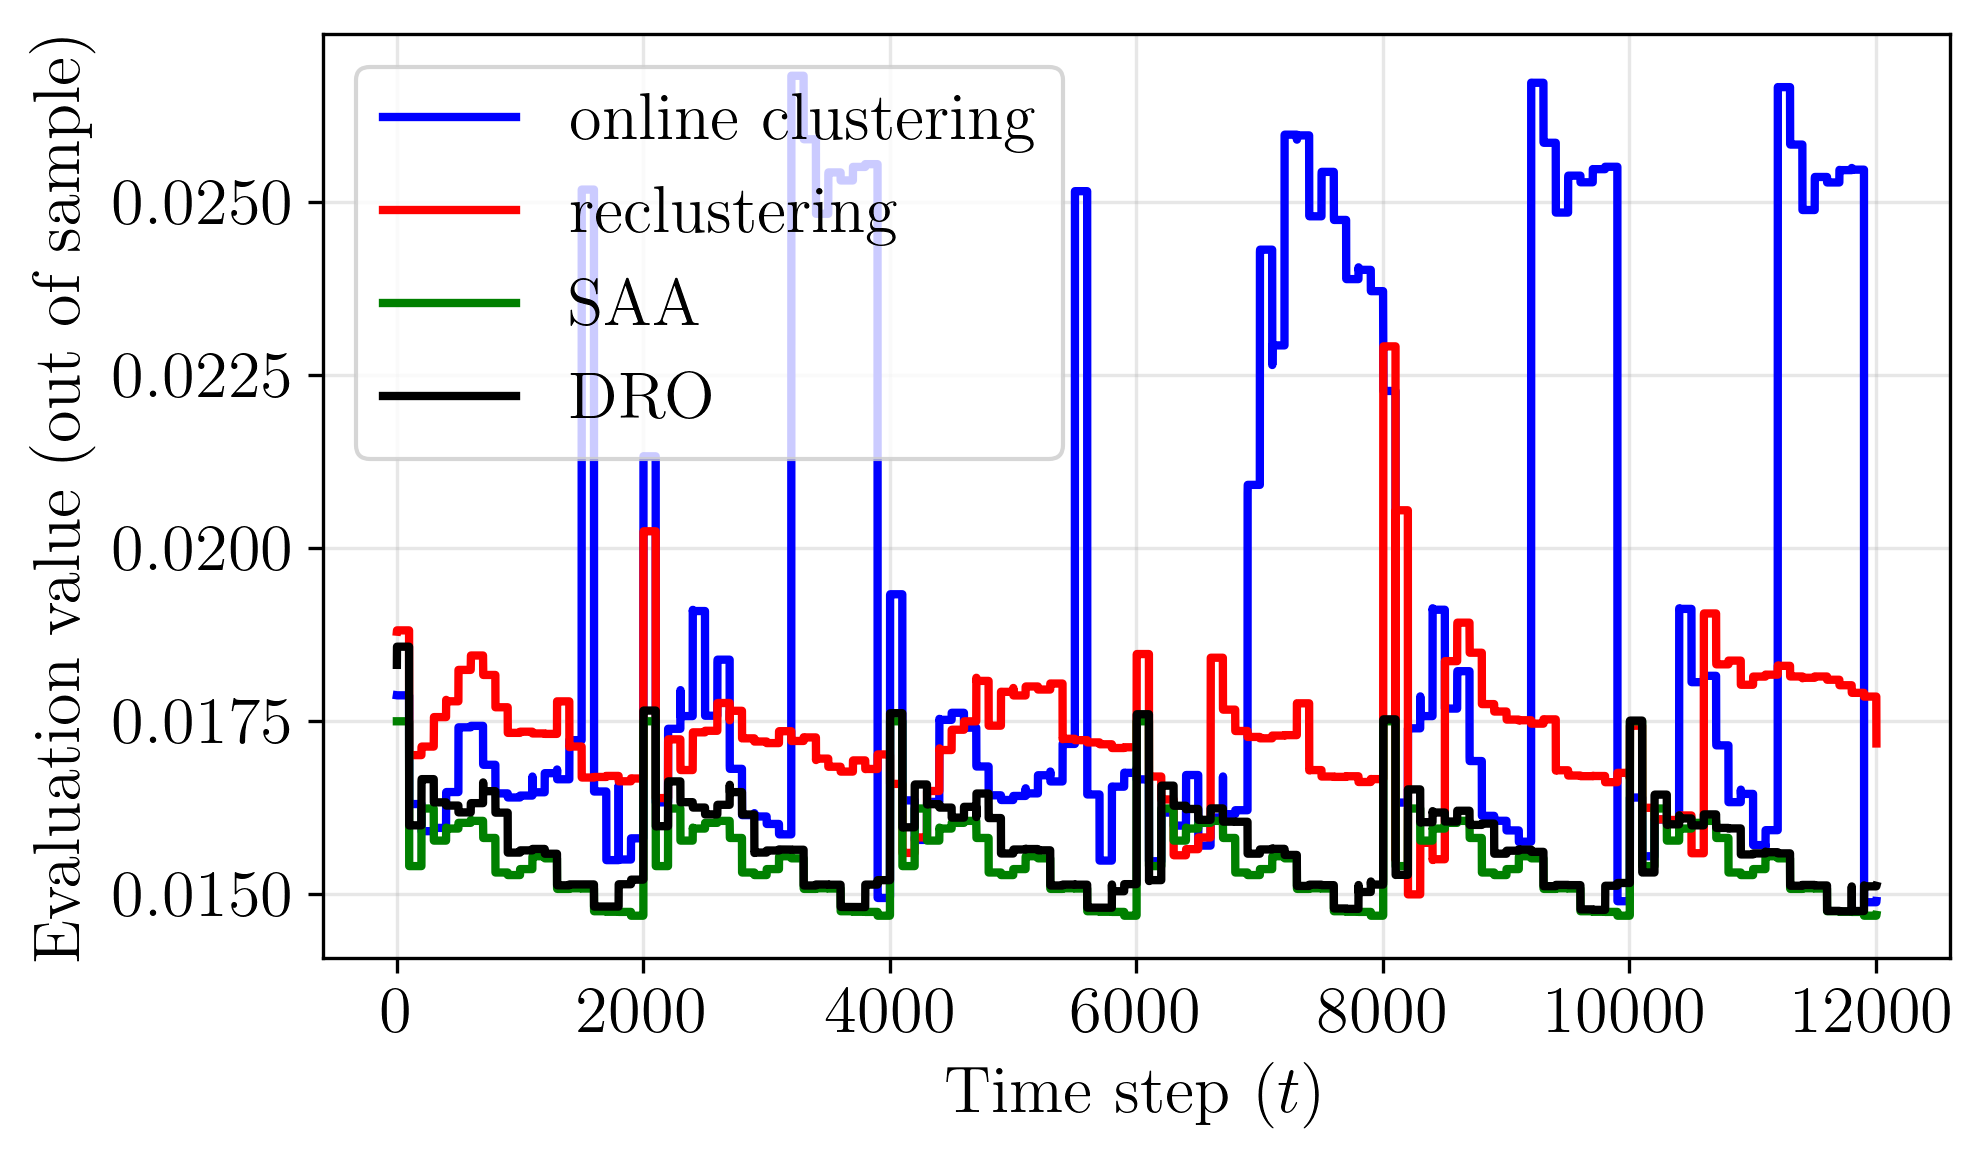

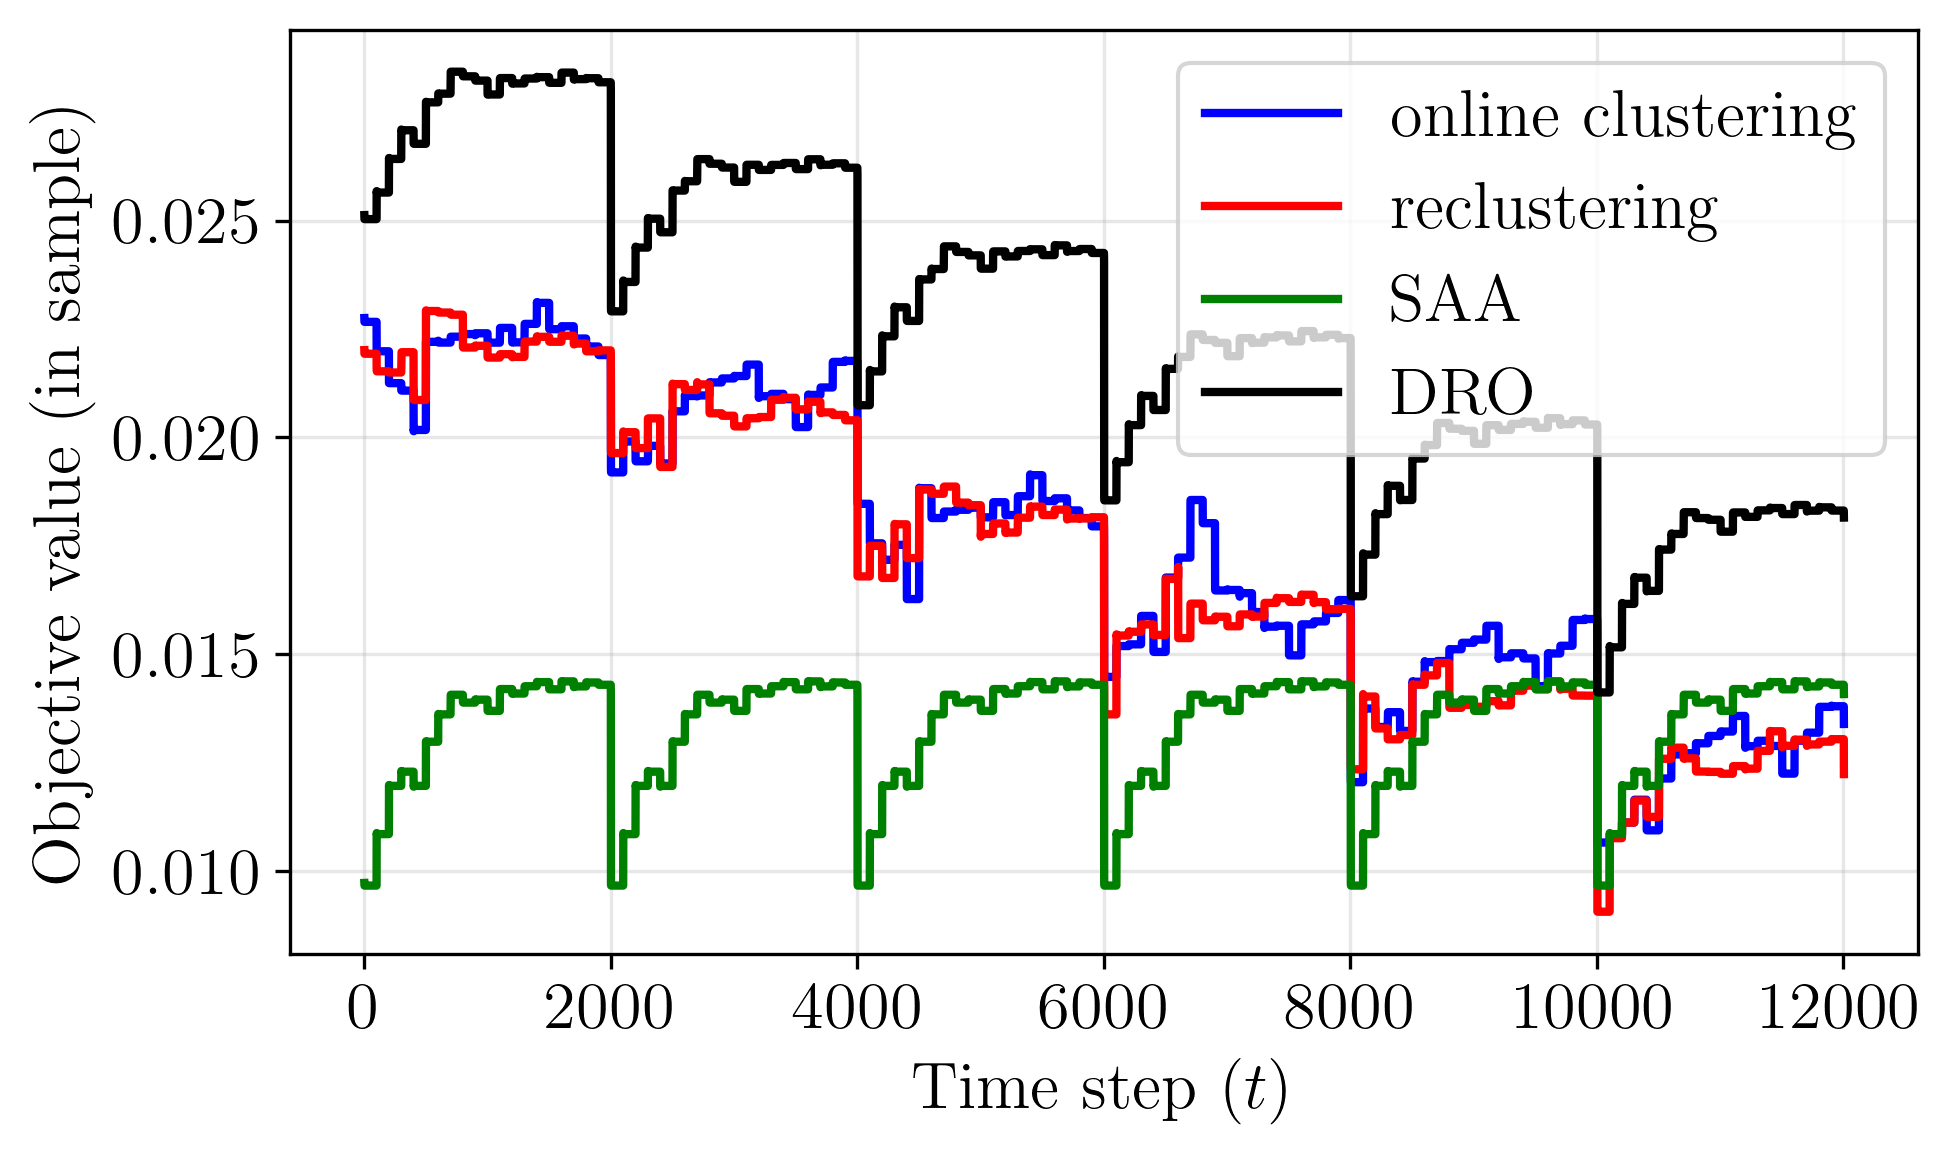

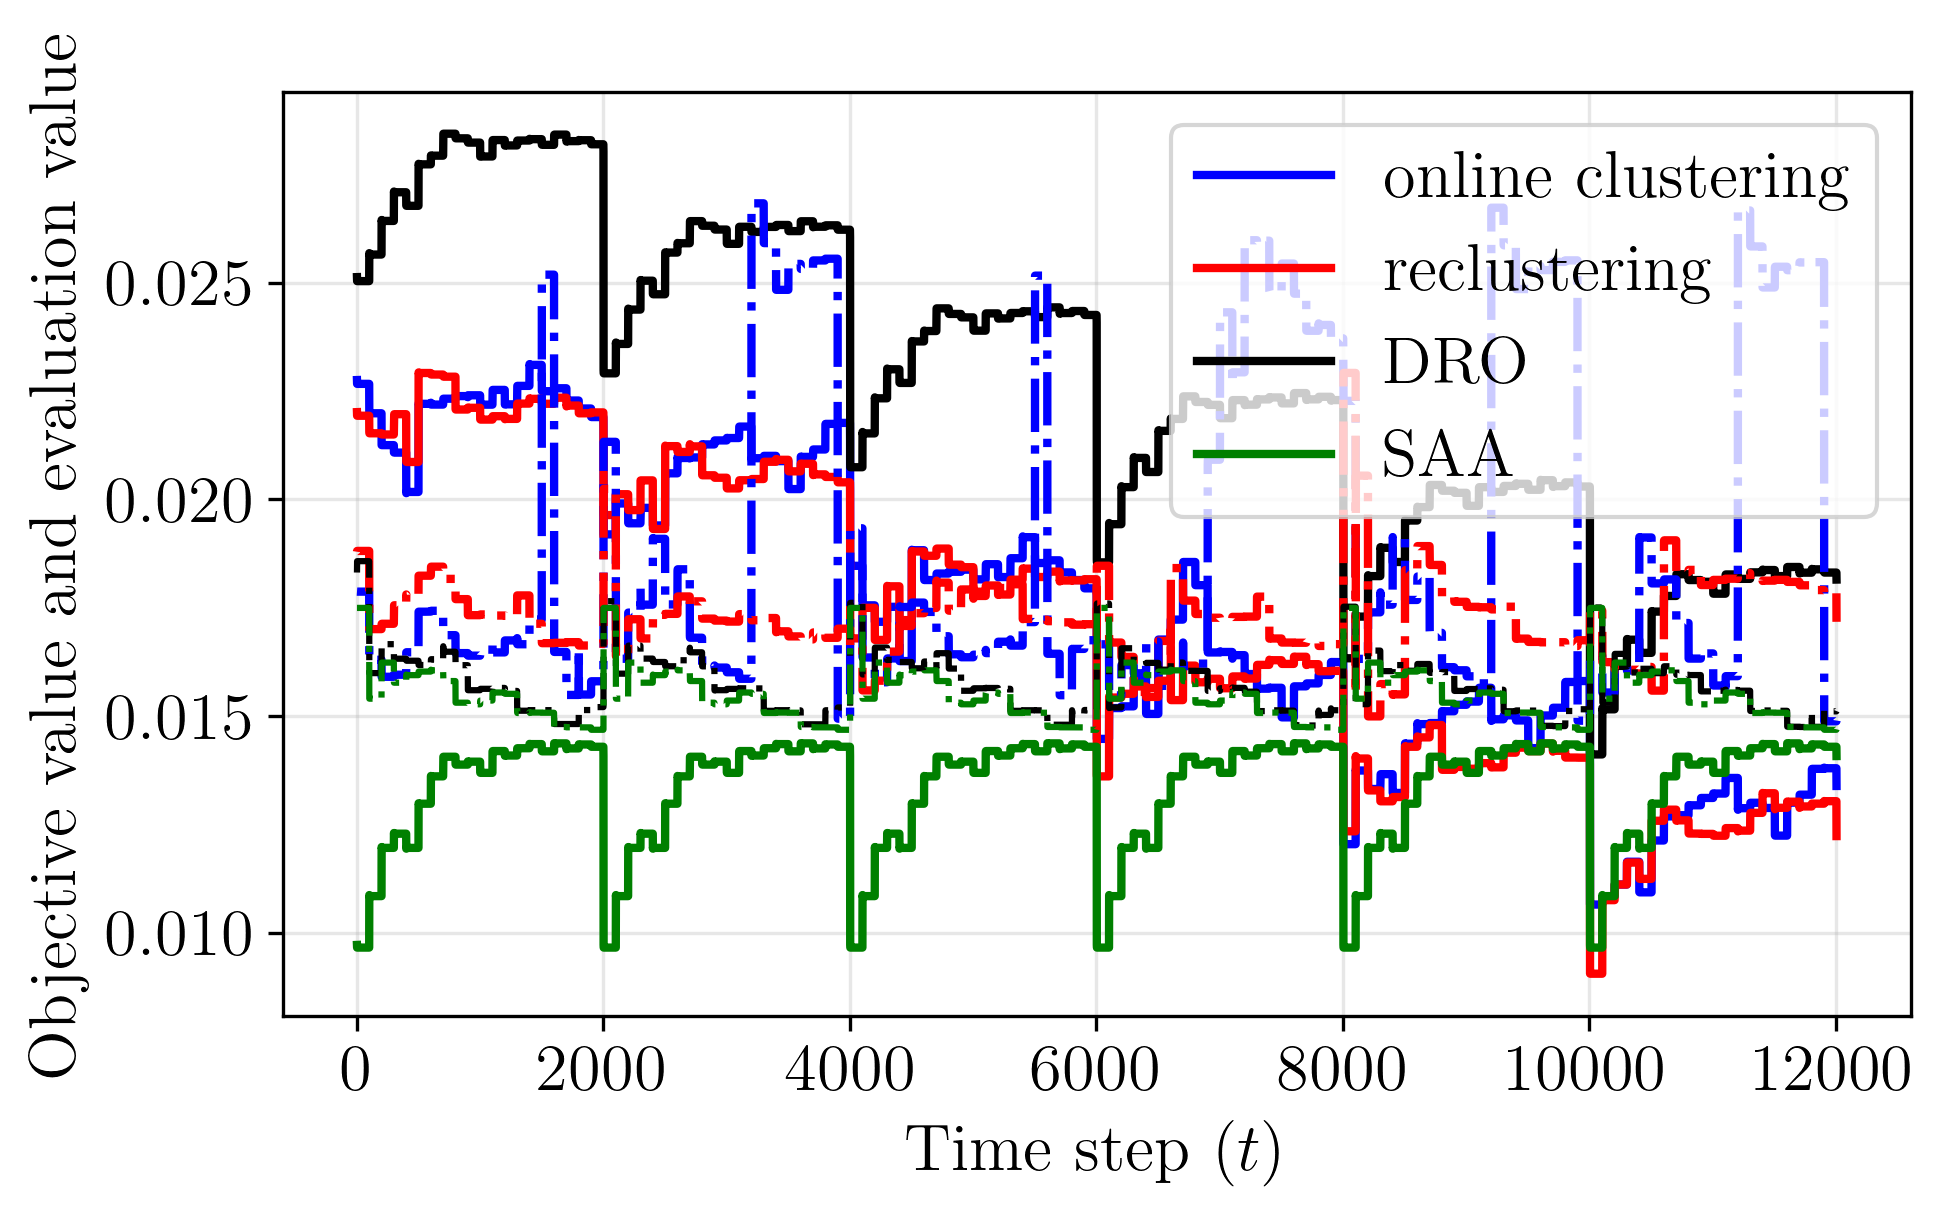

In [138]:
plot_eval(df1['eval'],df1['MRO_eval'],df1['DRO_eval'],df1['SA_eval'],df1)

In [110]:
import itertools
list_inds = list(itertools.product(np.arange(5),np.arange(4)))

In [114]:
a,b = list_inds[1]

In [112]:
len(list_inds)

20

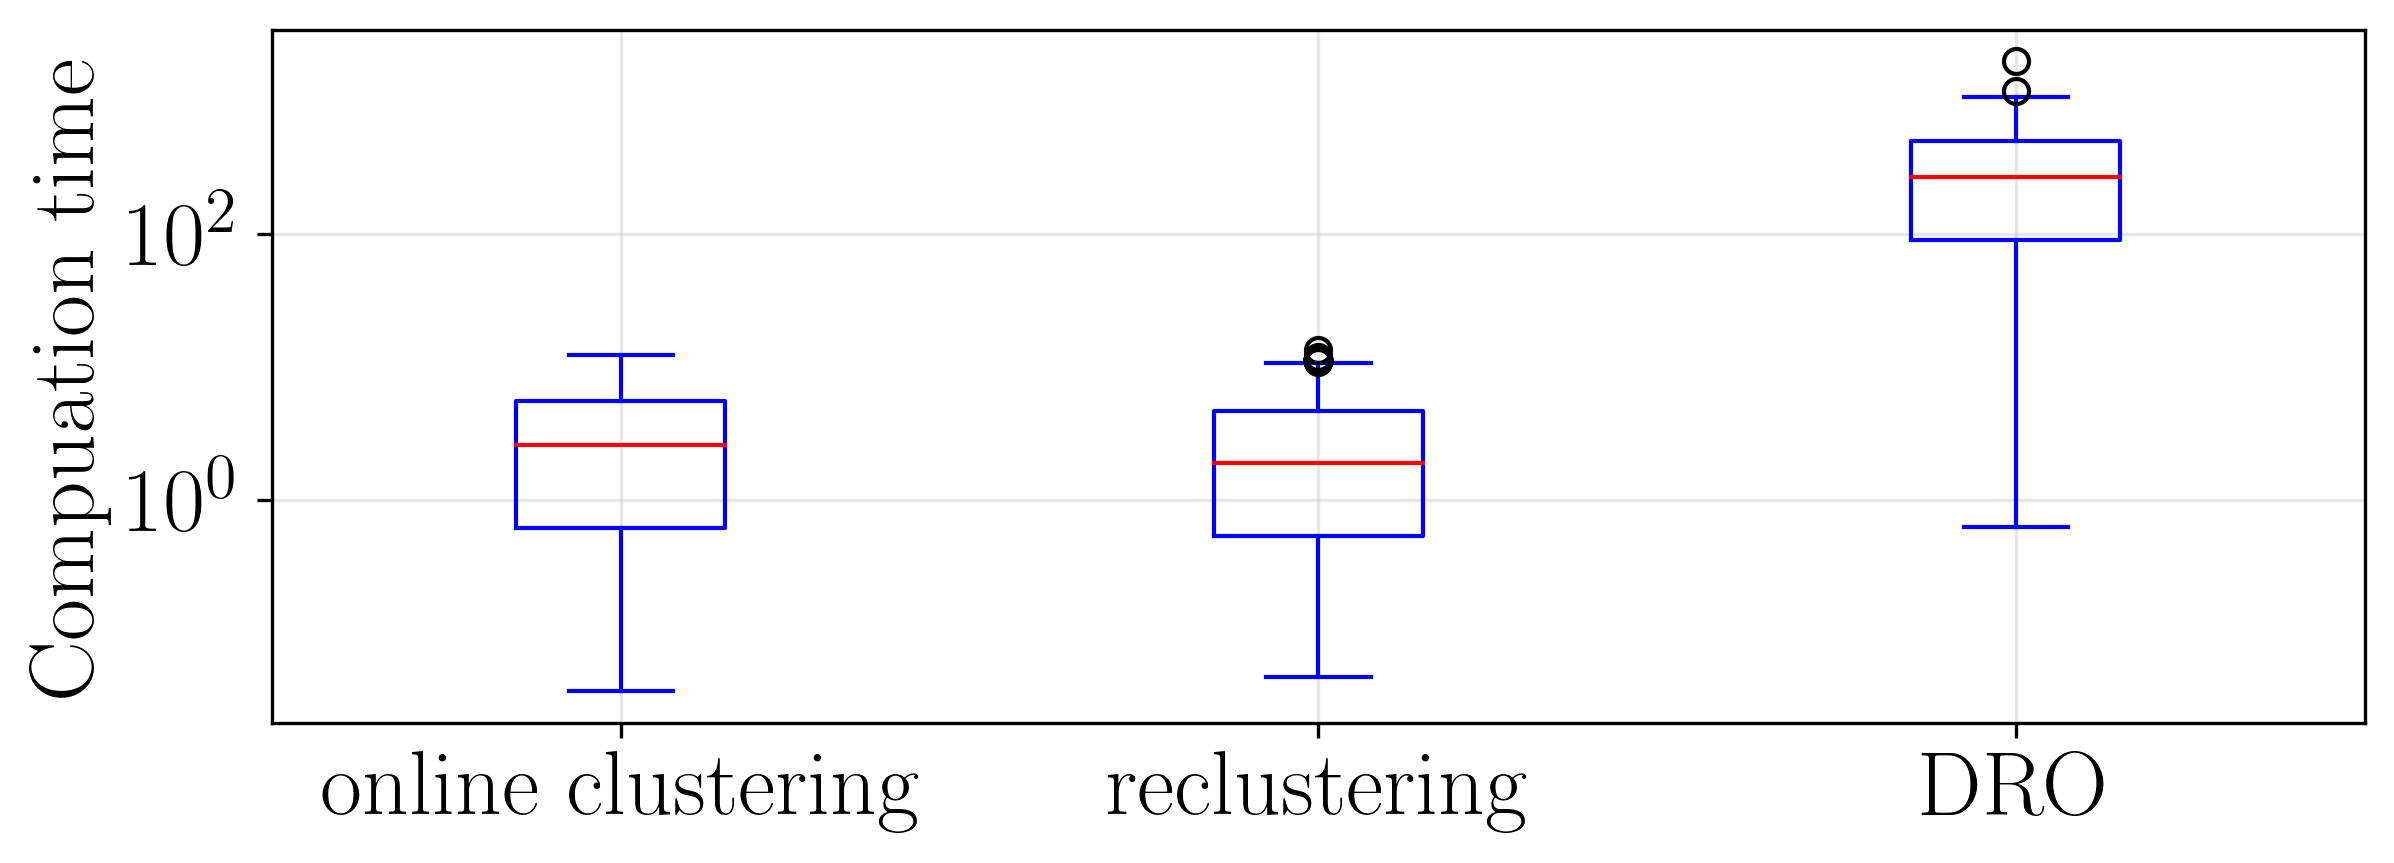

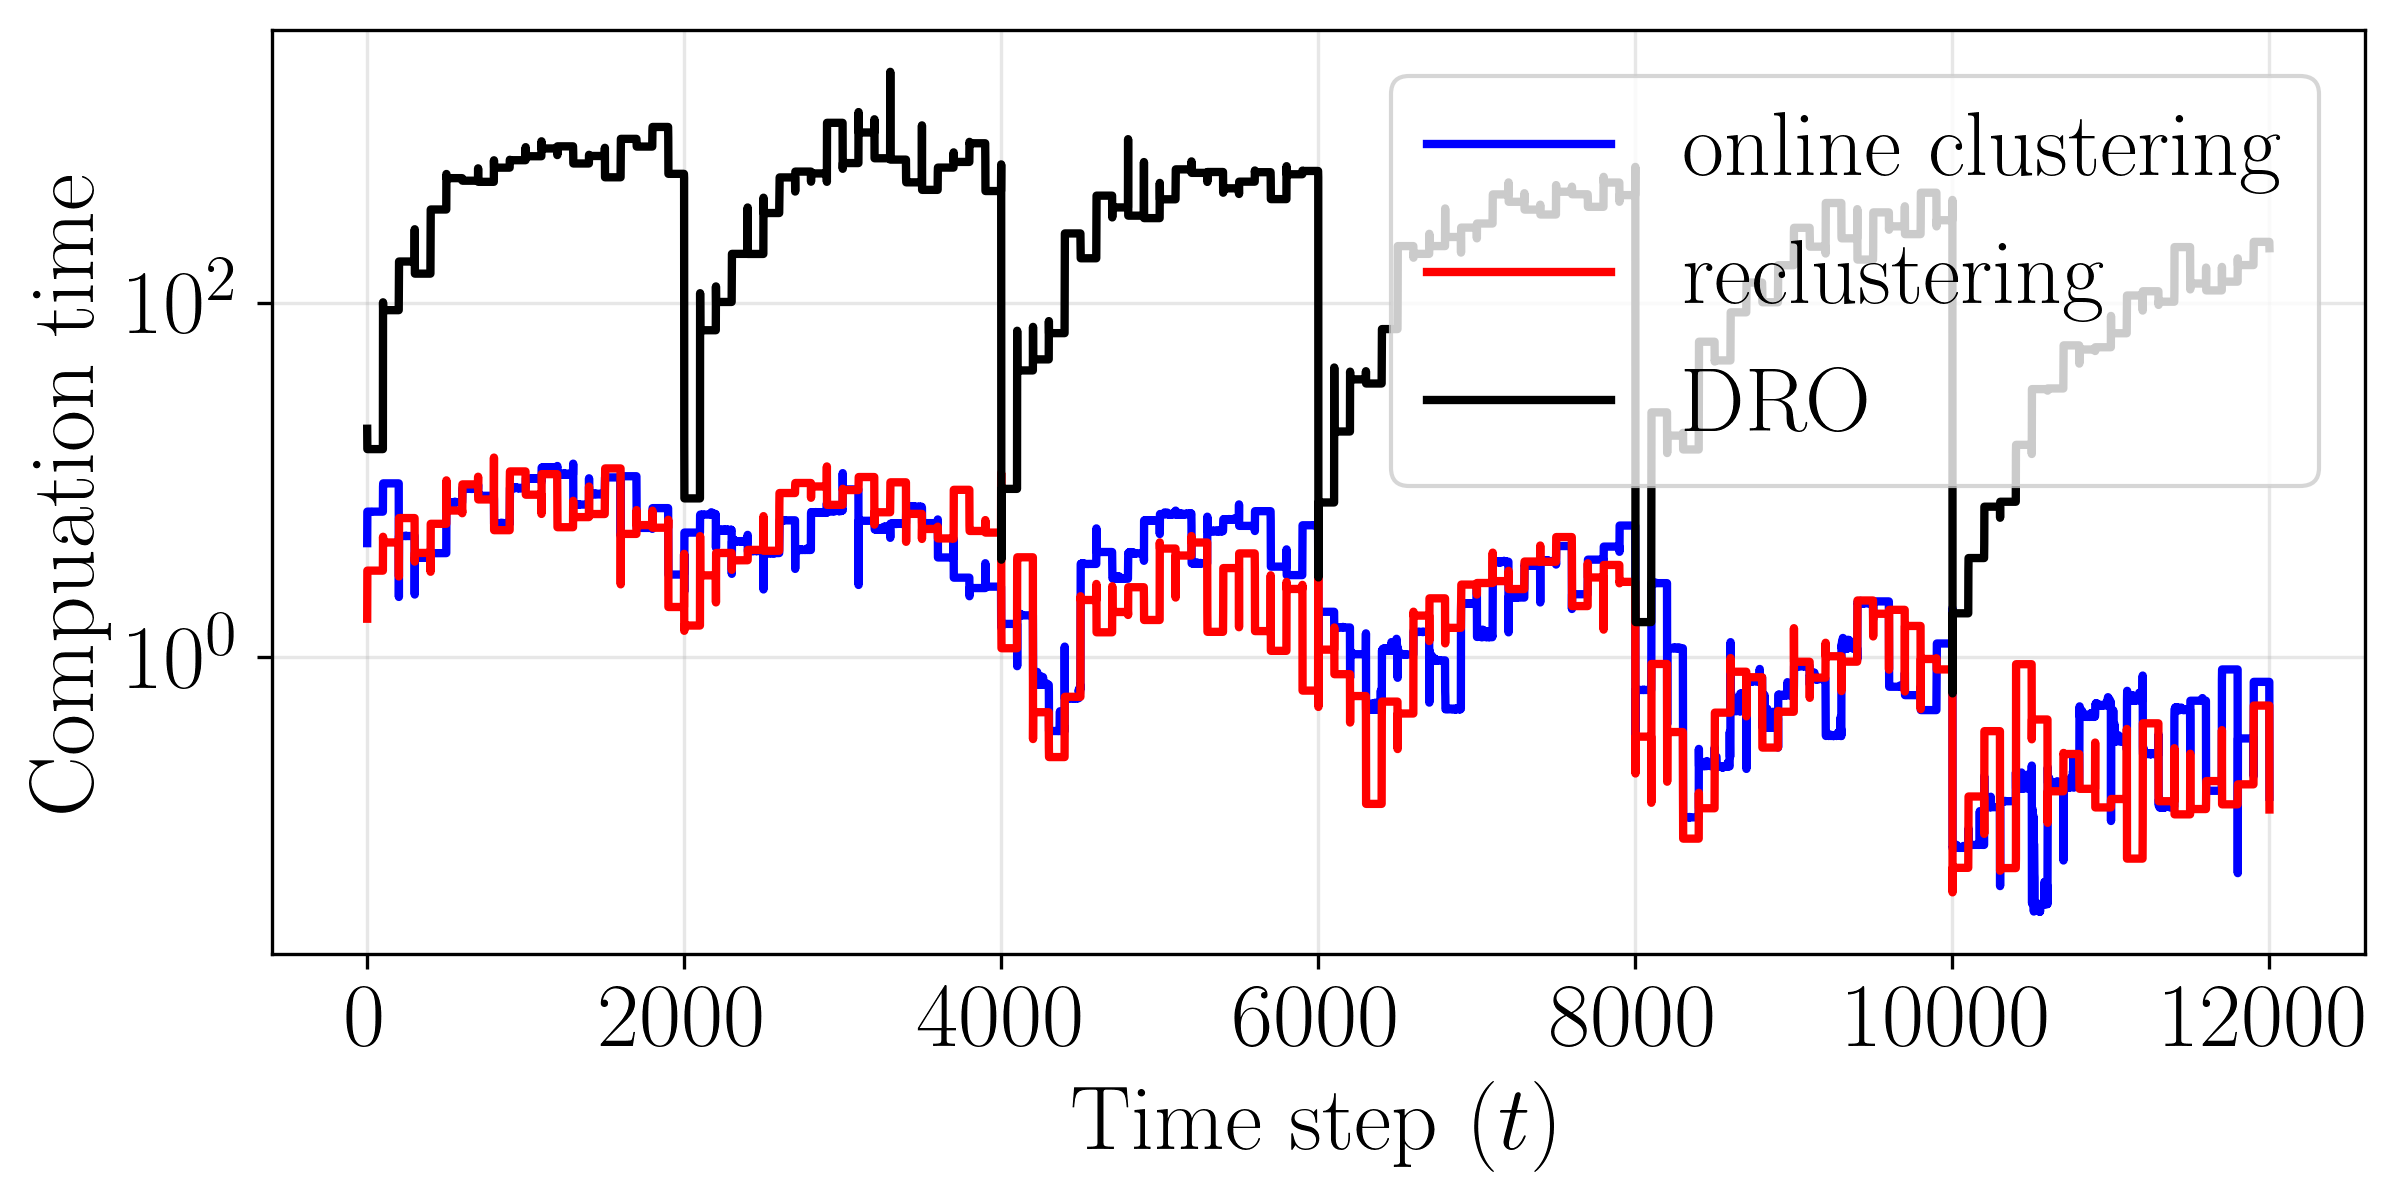

In [139]:
plot_computation_times(df1)
plot_computation_times_iter(df1)

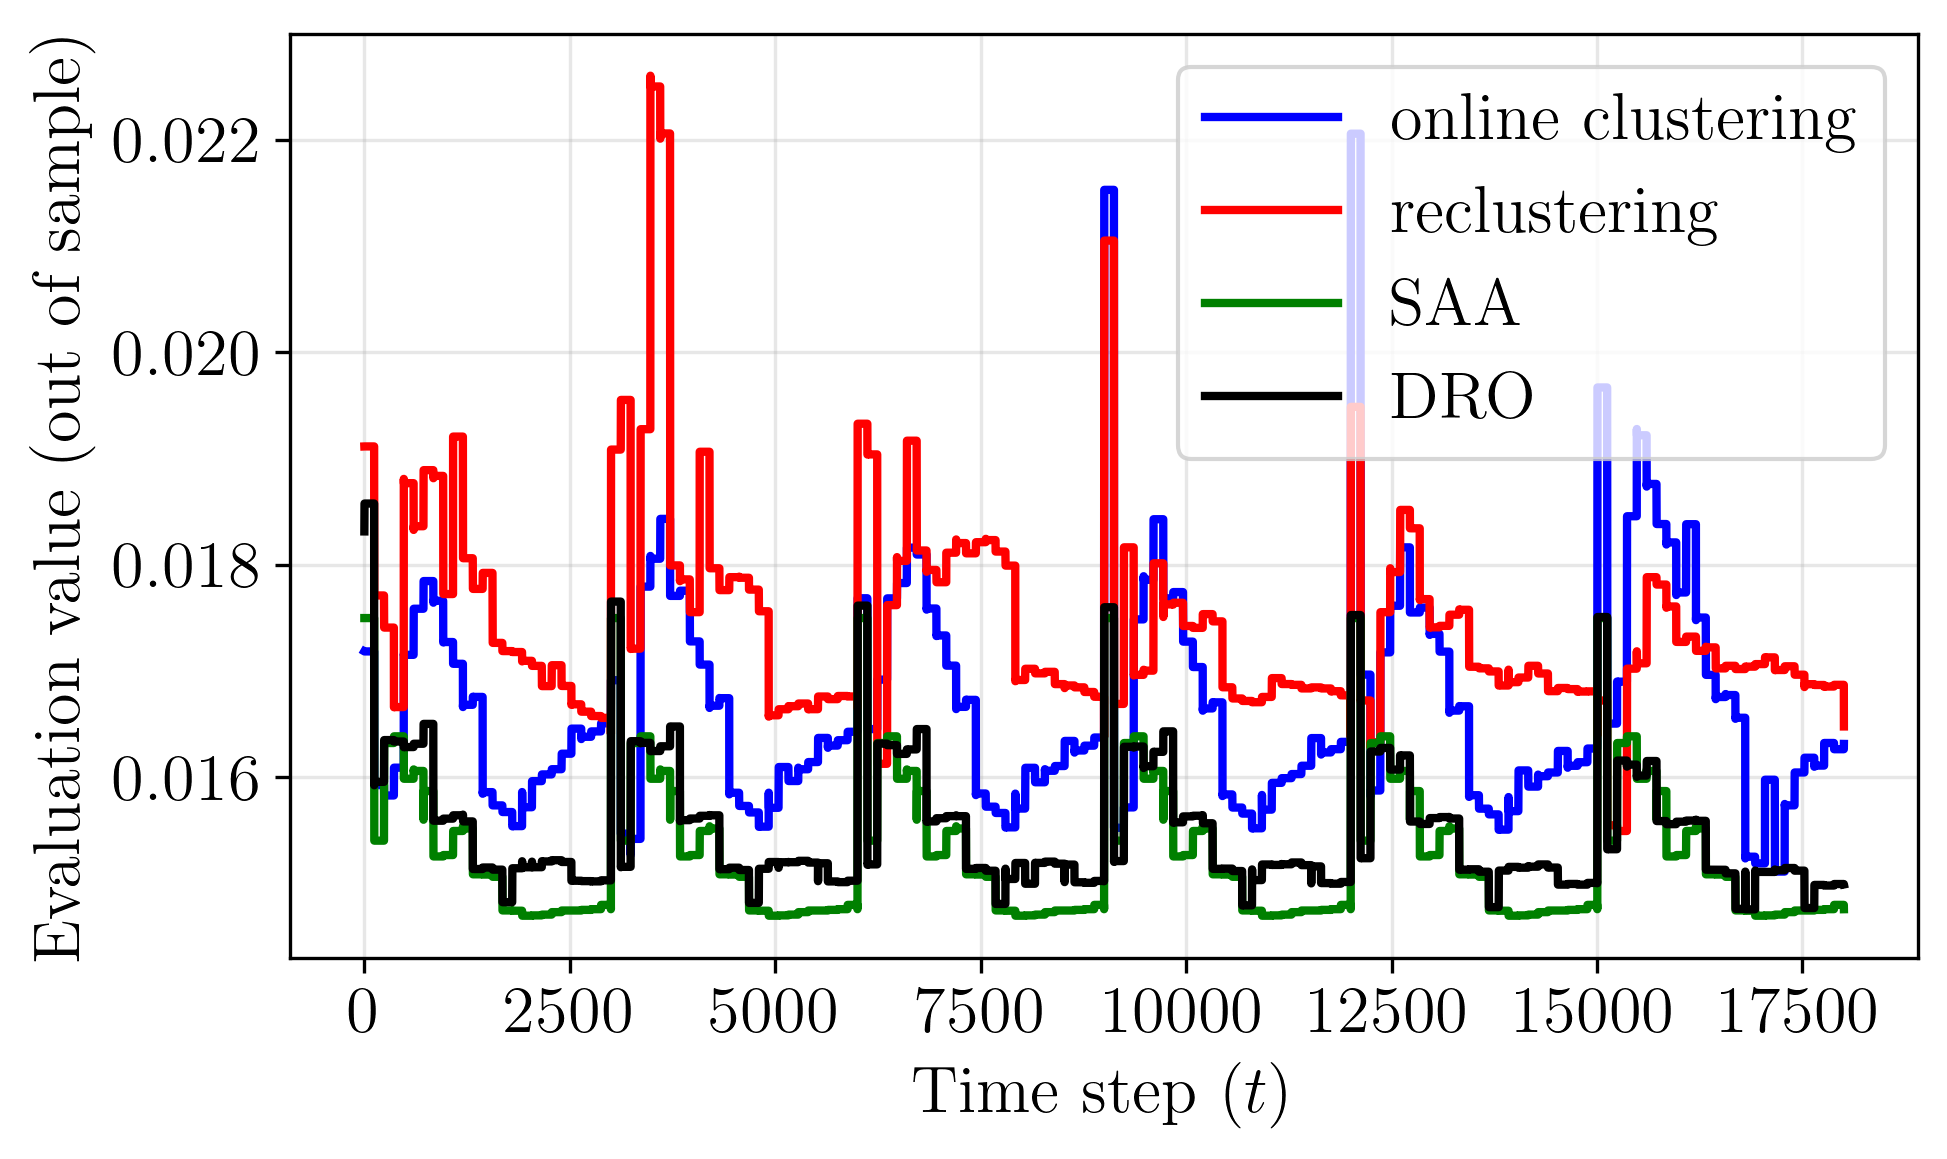

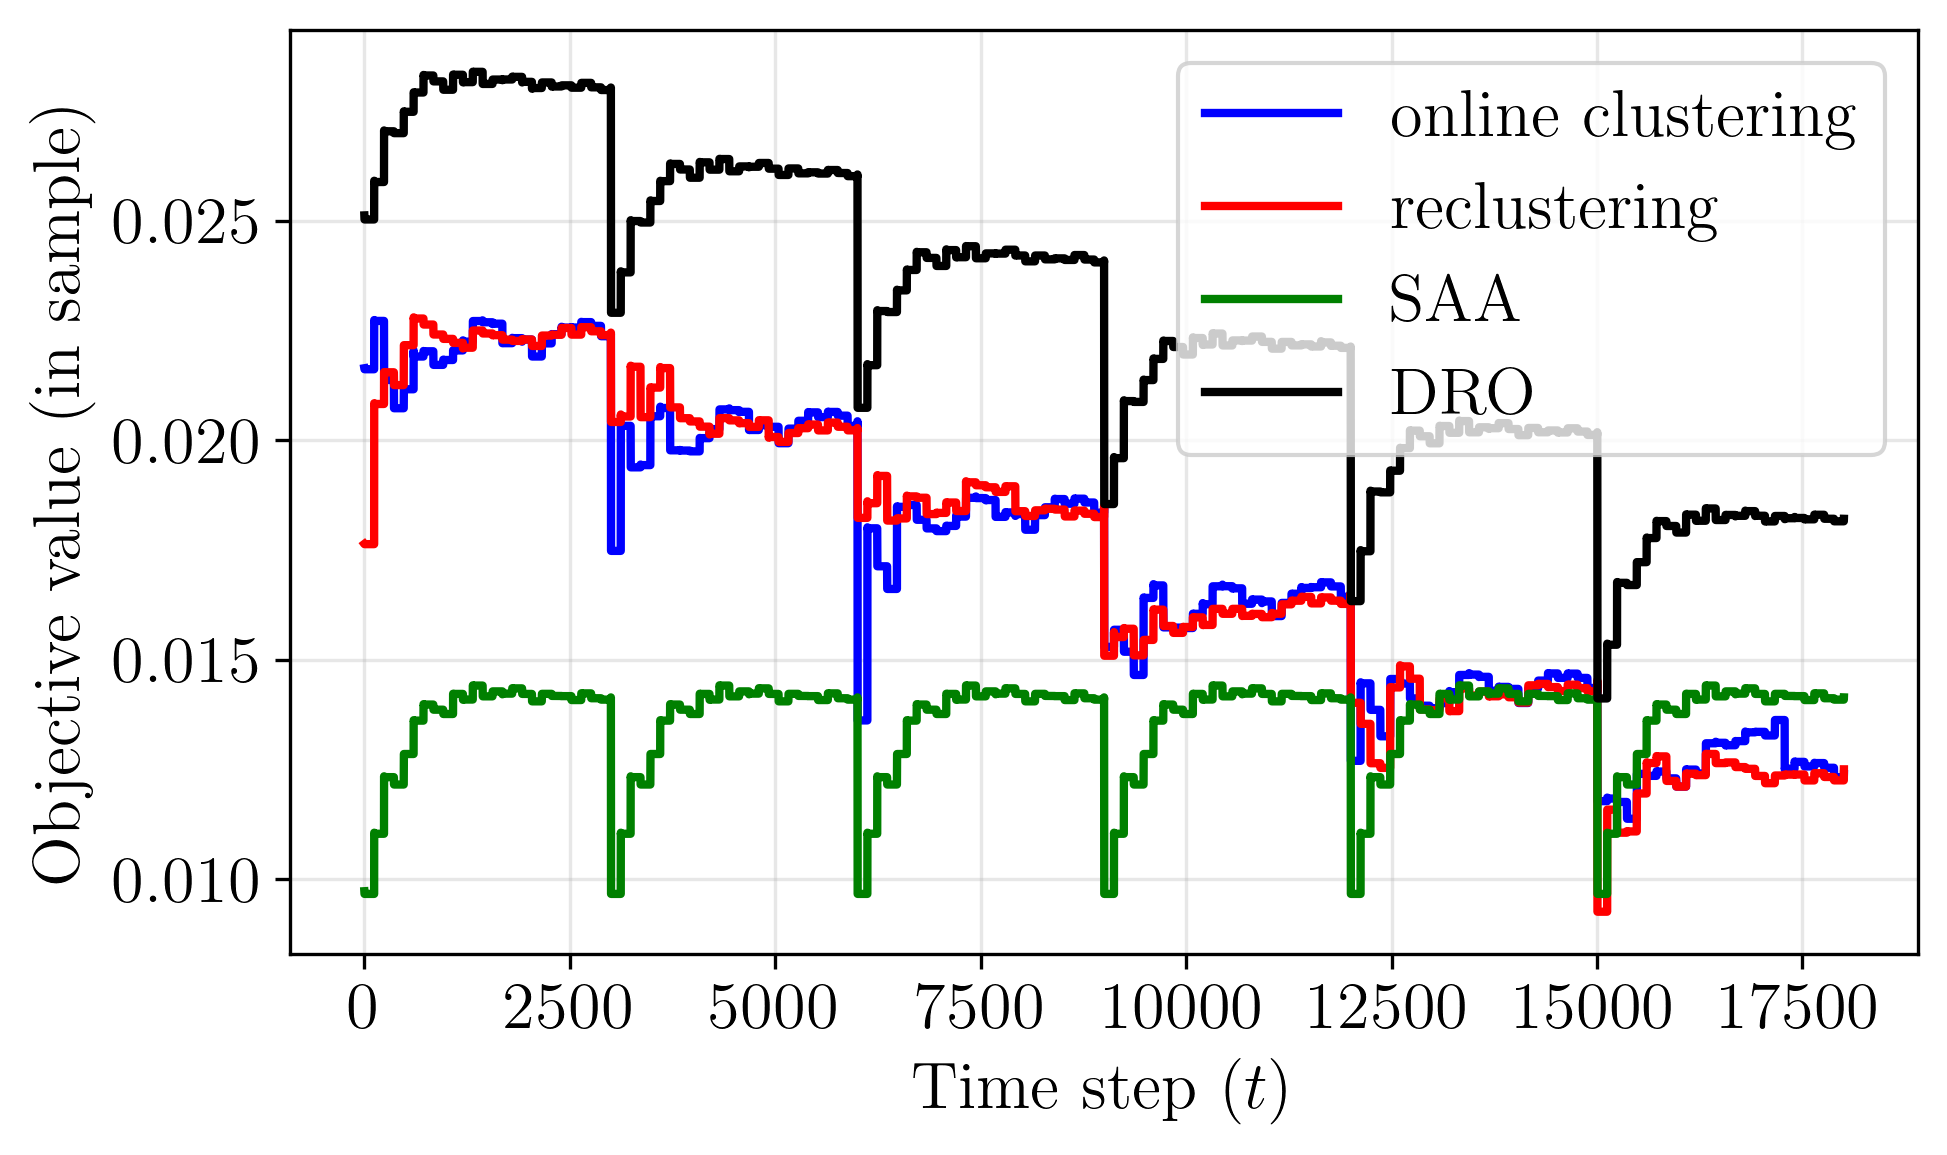

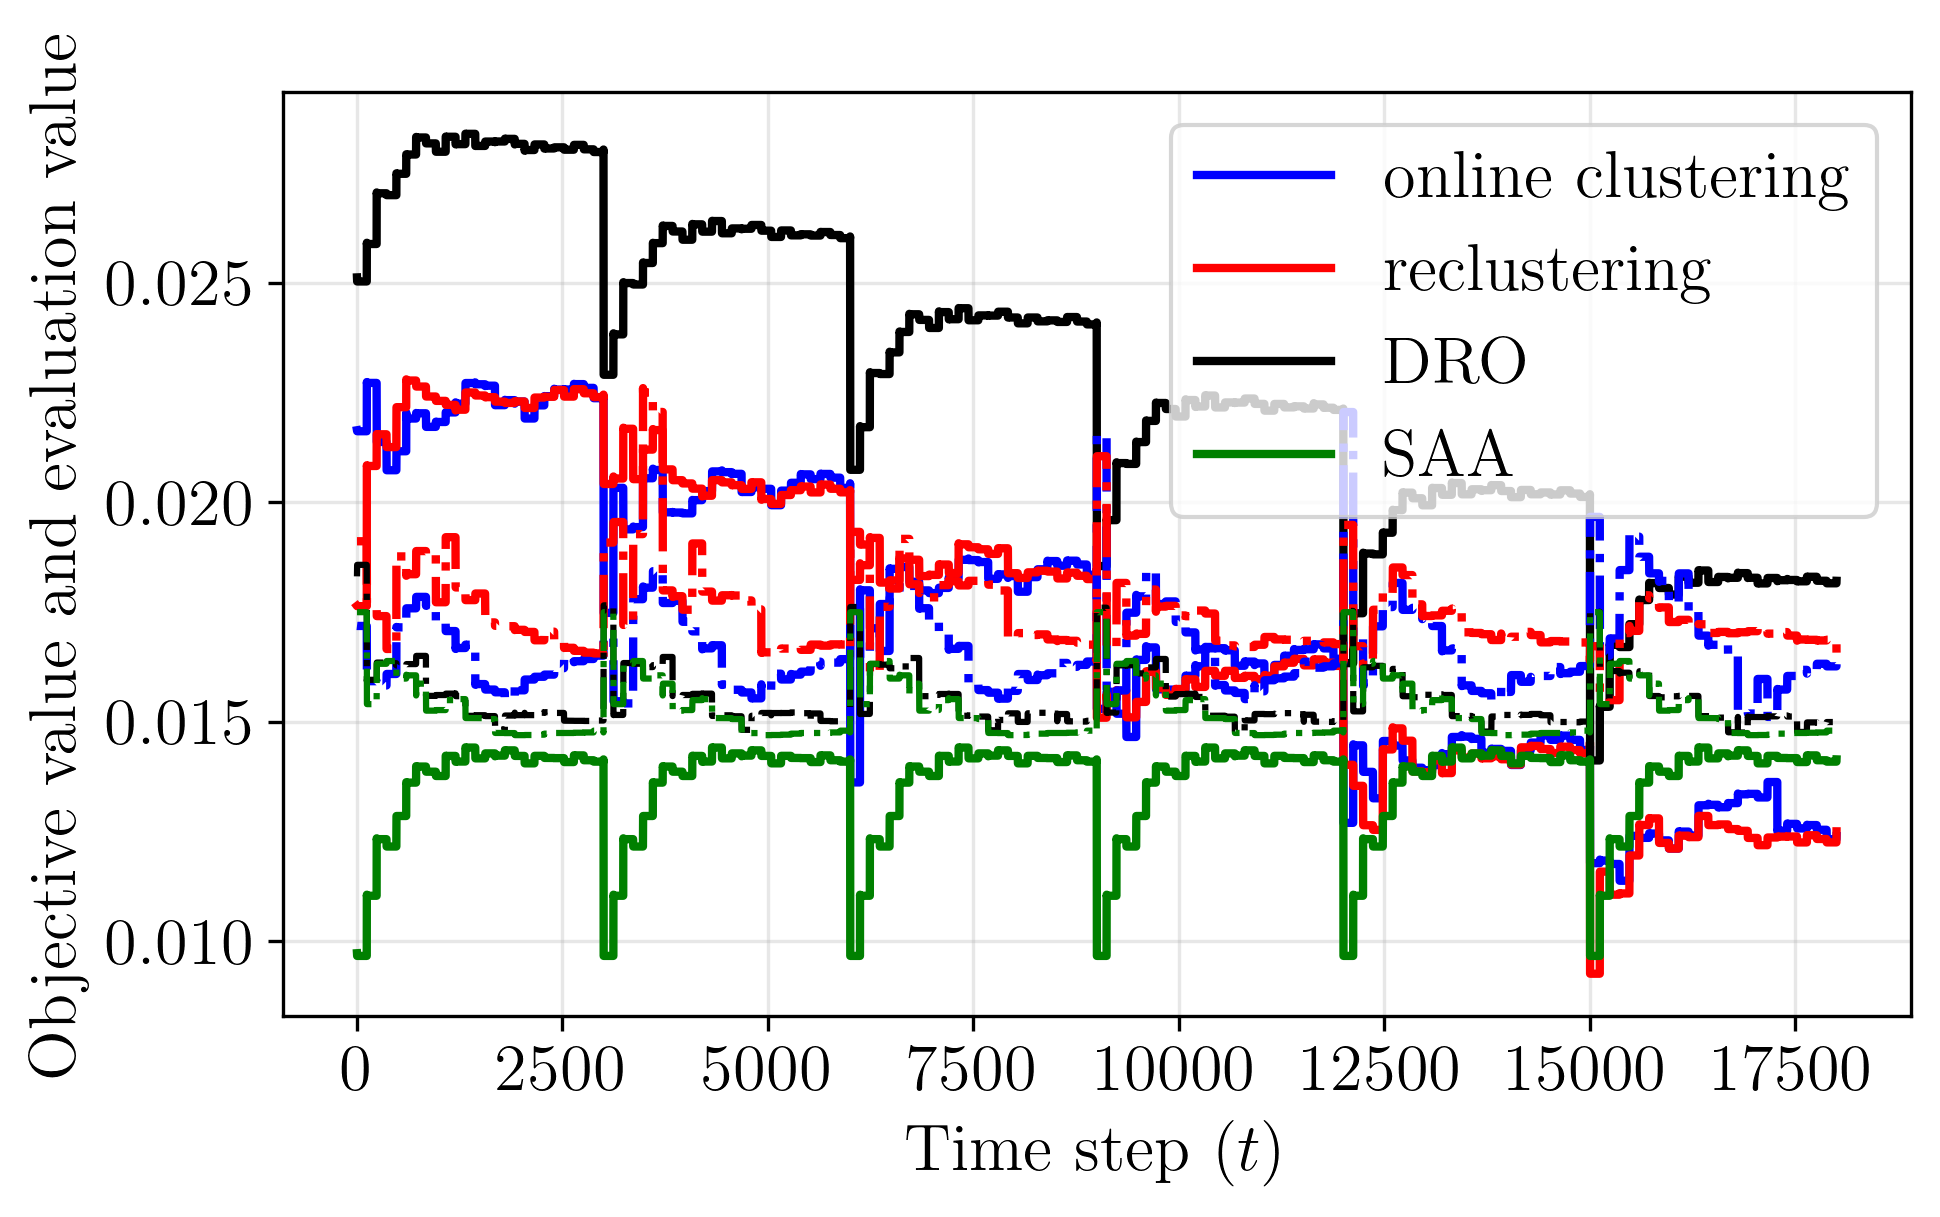

In [145]:
plot_eval(df2['eval'],df2['MRO_eval'],df2['DRO_eval'],df2['SA_eval'],df2)

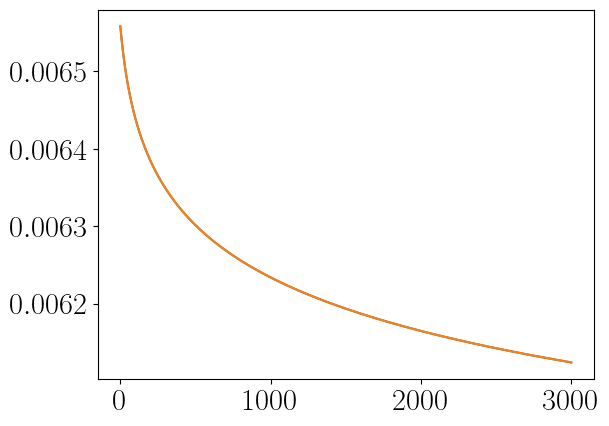

In [40]:
init_eps = 0.007
m = 30
plt.plot(df1['epsilon'])
plt.plot([init_eps*(1/(num_dat**(1/(2*m)))) for num_dat in range(50,3051) ])

In [57]:
def tofloatarray(string):
    string = string.replace('[', '').replace(']', '')
    return np.fromstring(string, sep=' ')

def pad_array(array, K):
    num_zeros = K - len(array)
    return np.concatenate((array, np.zeros(num_zeros)))

In [ ]:
temp = np.zeros(10)
temp = np.array(df1['obj_values'] >= df1['eval'])

In [116]:
newdf = pd.concat([dfs[i] for i in range(3)],ignore_index=True)

In [146]:
df = df2
kweights = np.vstack([tofloatarray(df['weights'][j]) for j in range(3001) ])
qweights = np.vstack([np.sort(pad_array(tofloatarray(df['weights_q'][j]),500)) for j in range(3001) ])

/var/folders/yj/ns1g3ynx5sq0b0747kq8nz21t6q45w/T/ipykernel_36984/53042447.py:3: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return np.fromstring(string, sep=' ')


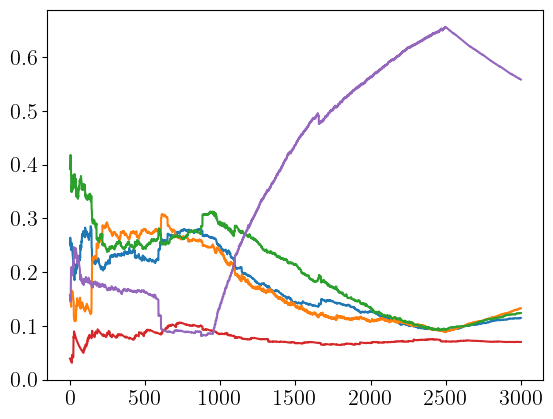

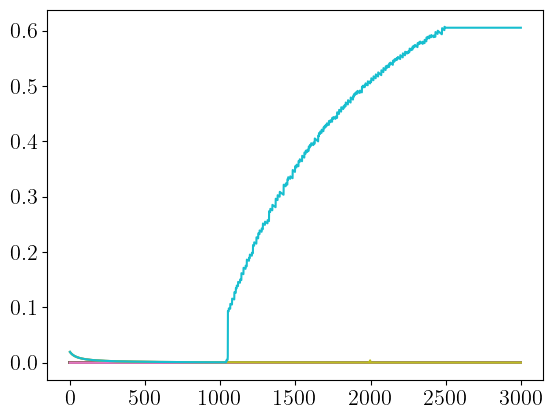

In [147]:
for j in range(5):
  plt.plot(kweights[:,j])
plt.show()
for j in range(500):
  plt.plot(qweights[:,j])

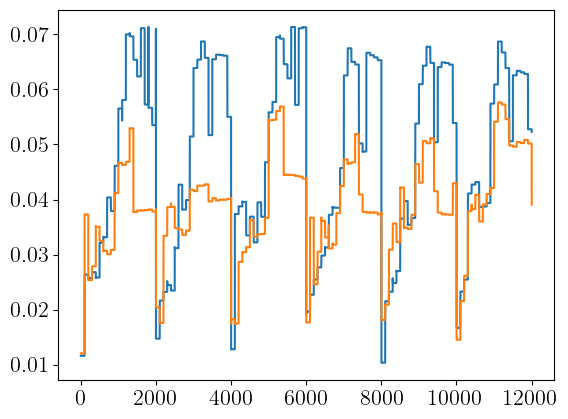

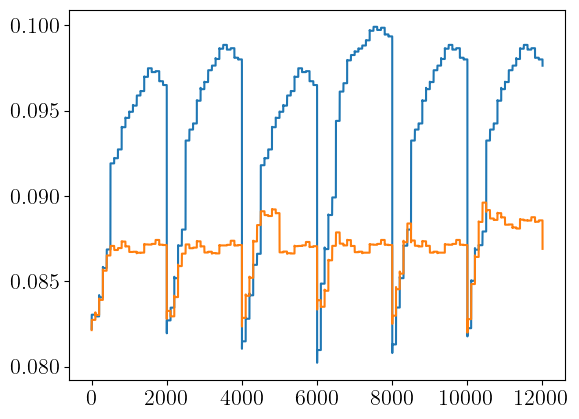

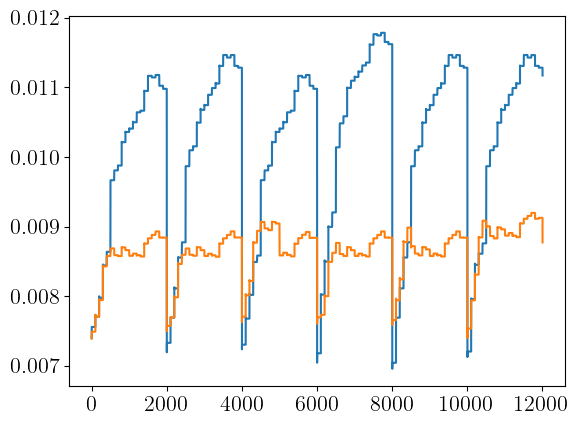

In [142]:
plt.plot(np.array(df1['sig_val']))
plt.plot(np.array(df1['MRO_sig_val']))
plt.show()
plt.plot(np.array(df1['mean_val']))
plt.plot(np.array(df1['MRO_mean_val']))
plt.show()
plt.plot(np.array(df1['square_val']))
plt.plot(np.array(df1['MRO_square_val']))
plt.show()

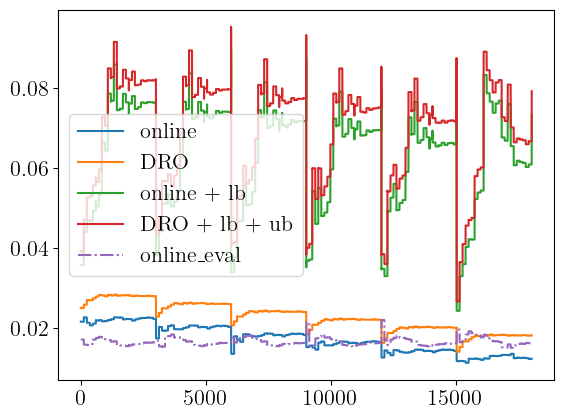

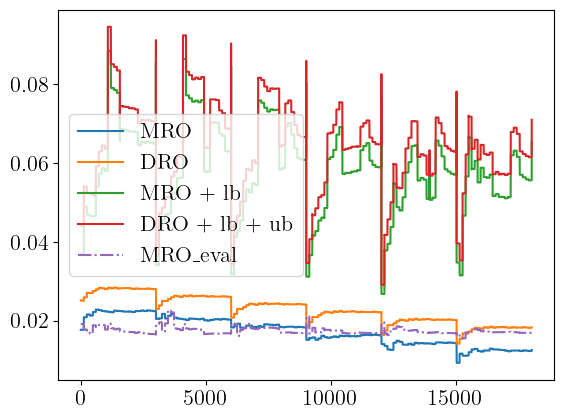

In [144]:
df = df2
plt.plot(np.array(df['obj_values']), label = "online")
plt.plot(np.array(df['DRO_obj_values']), label = "DRO")
plt.plot(np.array(np.array(df['obj_values']) + df['sig_val']), label = "online + lb")
plt.plot(np.array(np.array(df['DRO_obj_values']) + df['sig_val']), label = "DRO + lb + ub")
plt.plot(np.array(df['eval']), linestyle = '-.', label = "online_eval")

plt.legend()
plt.show()

plt.plot(np.array(df['MRO_obj_values']), label = "MRO")
plt.plot(np.array(df['DRO_obj_values']), label = "DRO")
plt.plot(np.array(np.array(df['MRO_obj_values']) + df['MRO_sig_val']), label = "MRO + lb")
plt.plot(np.array(np.array(df['DRO_obj_values']) + df['MRO_sig_val']), label = "DRO + lb + ub")
plt.plot(np.array(df['MRO_eval']), linestyle = '-.', label = "MRO_eval")
plt.legend()
plt.show()

In [ ]:
def plot_computation_times():
    """Plot computation time analysis with LaTeX formatting."""
    # Set up LaTeX rendering
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "font.size": 22,
        "axes.labelsize": 22,
        "axes.titlesize": 22,
        "legend.fontsize": 22
    })
    
    # Create figure
    plt.figure(figsize=(15, 3), dpi=300)
    
    # Prepare data for boxplot
    data = [
        df['online_time'][::25], df['MRO_time'][::25],df['DRO_time'][::25]
    ]
    # Create boxplot
    bp = plt.boxplot(data, labels=[

        r'online clustering', r'reclustering', r'DRO' 
    ])
    
    # Customize boxplot colors
    plt.setp(bp['boxes'], color='blue')
    plt.setp(bp['whiskers'], color='blue')
    plt.setp(bp['caps'], color='blue')
    plt.setp(bp['medians'], color='red')

    
    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.ylabel(r'Compuation time')
    plt.yscale("log")
    # plt.savefig('time.pdf', bbox_inches='tight', dpi=300)

python(49076) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


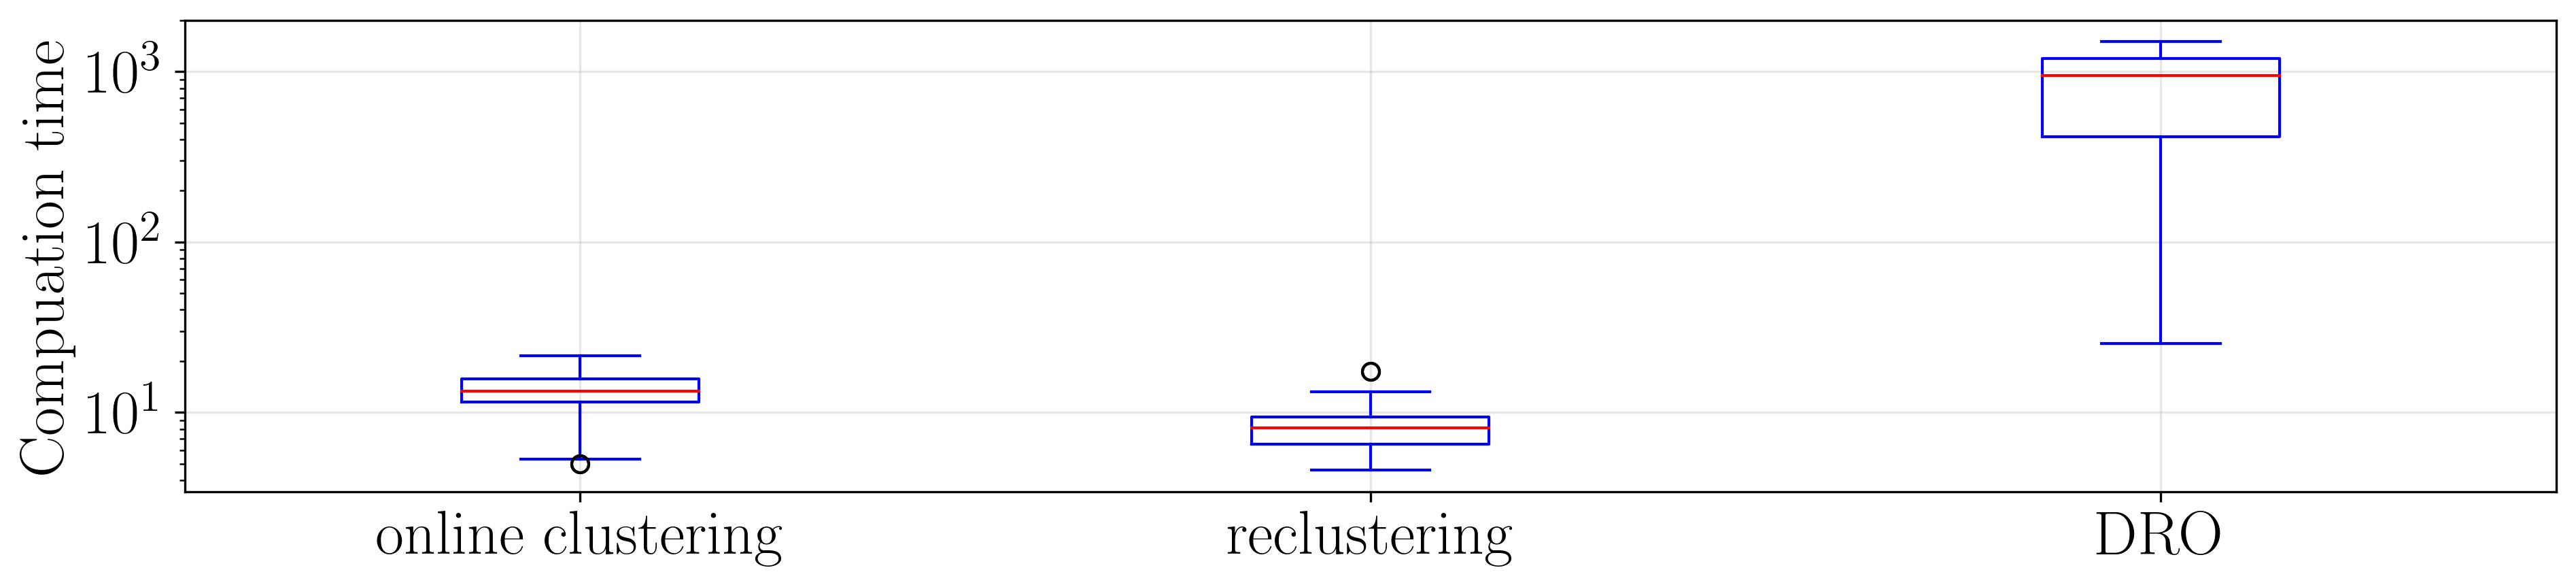

In [ ]:
plot_computation_times()

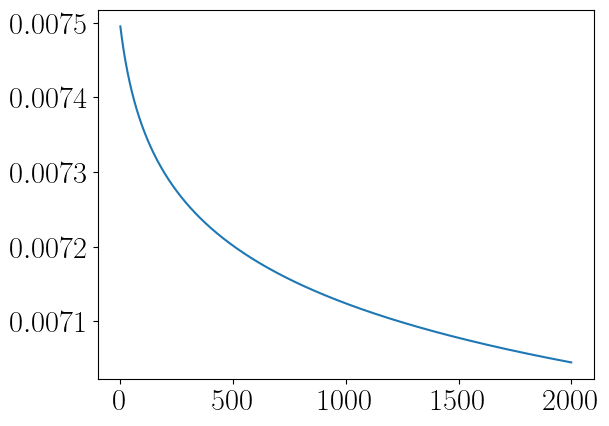

In [ ]:
plt.plot(df['epsilon'])